In [23]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [3]:
base = pd.read_csv('../../Data/BaseData.csv')

In [4]:
base.shape

(2580, 299)

In [5]:
MLR = LinearRegression()

In [6]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [7]:
len(y)

2580

In [8]:
X.shape

(2580, 298)

In [9]:
X.shape[1]

298

In [10]:
Scores = []
AdjR2 = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    MLR.fit(X_train, y_train)
    pred = MLR.predict(X_test)
    Score = r2_score(y_test, pred)
    Scores.append(Score)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)

In [11]:
PositiveR2 = []
NegativeR2 = []

for i in Scores:
    if i < 0:
        NegativeR2.append(i)
    else:
        PositiveR2.append(i)

In [12]:
PositiveAR2 = []
NegativeAR2 = []

for i in AdjR2:
    if i < 0:
        NegativeAR2.append(i)
    else:
        PositiveAR2.append(i)

In [20]:
R2 = pd.DataFrame(PositiveR2, columns=['R_Squared'])

In [21]:
AR2 = pd.DataFrame(PositiveAR2, columns=['Adjusted_R2'])

In [22]:
R2vAR2 = pd.concat([R2, AR2], axis=1)

In [24]:
R2vAR2

,R_Squared,Adjusted_R2
0,0.917601,0.906836
1,0.872014,0.855294
2,0.882604,0.867266
3,0.869004,0.851891
4,0.915148,0.904062
...,...,...
79,0.860418,0.842182
80,0.920704,0.910344
81,0.907738,0.895685
82,0.851816,0.832456


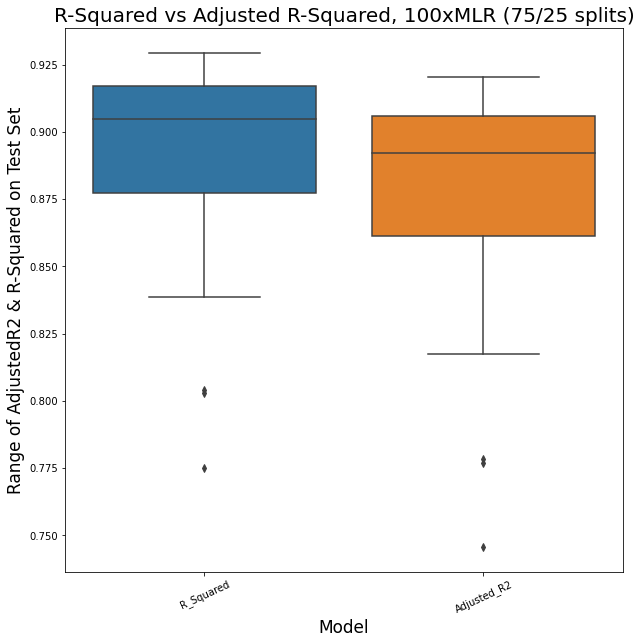

In [25]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xMLR (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=R2vAR2)
plt.xticks(rotation=25);

In [26]:
print("Number of times results produced Negative R2: " + str((len(NegativeR2))))
print("Number of times results produced Negative Adjusted R2: " + str((len(NegativeAR2))))

Number of times results produced Negative R2: 16
Number of times results produced Negative Adjusted R2: 16


In [14]:
NegativeR2

[-34523.14201714882,
 -41354.91544887651,
 -104105335.33976942,
 -1996856.2524710367,
 -48830.15774435334,
 -27705.78987130878,
 -4722406.90574028,
 -45529.67213262052,
 -4127.654700950276,
 -165841.99611613614,
 -248617.41292241323,
 -8673298.77830421,
 -6887571.239916954,
 -13097875.56681814,
 -19759.772530783284,
 -732.8977957779484]

In [15]:
NegativeAR2

[-39033.52970724542,
 -46757.836450088784,
 -117706120.1838077,
 -2257734.578308989,
 -55209.677695171966,
 -31325.528311313174,
 -5339363.30903296,
 -51478.00194214307,
 -4667.040540881526,
 -187508.46382442574,
 -281098.0297794405,
 -9806417.293838913,
 -7787394.355872787,
 -14809040.501895653,
 -22341.40787237619,
 -828.7774727362249]

In [16]:
len(NegativeR2) - len(NegativeAR2)

0

In [27]:
#df = pd.DataFrame(Positive, columns=['MLR'])
R2vAR2.to_csv('MLR_R2vAR2.csv', index=False)

In [12]:
#df_negative = pd.DataFrame(Negative, columns=['MLR Negative R2'])
#df_negative.to_csv('MLR_Negative_R2.csv', index=False)

In [28]:
R2vAR2['Difference'] = R2vAR2['R_Squared'] - R2vAR2['Adjusted_R2']

In [29]:
R2vAR2

,R_Squared,Adjusted_R2,Difference
0,0.917601,0.906836,0.010765
1,0.872014,0.855294,0.016721
2,0.882604,0.867266,0.015337
3,0.869004,0.851891,0.017114
4,0.915148,0.904062,0.011085
...,...,...,...
79,0.860418,0.842182,0.018236
80,0.920704,0.910344,0.010360
81,0.907738,0.895685,0.012054
82,0.851816,0.832456,0.019359


In [30]:
R2vAR2.Difference.mean()

0.01371613399298922